In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11890219477538558568
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 153681920
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16819556724977977102
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"
]


In [2]:
from keras.applications.densenet import DenseNet121

Using TensorFlow backend.


In [3]:
dense_net_conv = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [4]:
# Freeze the layers except the last 4 layers
for layer in dense_net_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in dense_net_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f2c867ea9b0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f2c86776fd0> False
<keras.layers.convolutional.Conv2D object at 0x7f2c86776e10> False
<keras.layers.normalization.BatchNormalization object at 0x7f2c867921d0> False
<keras.layers.core.Activation object at 0x7f2c867926a0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f2c846f8d30> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2c8675be10> False
<keras.layers.normalization.BatchNormalization object at 0x7f2c86792eb8> False
<keras.layers.core.Activation object at 0x7f2c841f2eb8> False
<keras.layers.convolutional.Conv2D object at 0x7f2caf033898> False
<keras.layers.normalization.BatchNormalization object at 0x7f2c841c5438> False
<keras.layers.core.Activation object at 0x7f2c84126080> False
<keras.layers.convolutional.Conv2D object at 0x7f2c841039b0> False
<keras.layers.merge.Concatenate object at 0x7f2c840cf278> False
<keras.layers.normalization.

In [5]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the densenet convolutional base model
model.add(dense_net_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1, 1, 1024)        7037504   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               205000    
Total params: 7,242,504
Trainable params: 243,912
Non-trainable params: 6,998,592
_________________________________________________________________


In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adamax(lr=1e-2),
              metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
num_classes = 200
epochs = 5

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "/home/ubuntu/DATA/ImageNet_Data/Train",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/DATA/ImageNet_Data/Validation',
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

train_history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=200)    

Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Epoch 1/5
2000/2000 [==============================] - 265s 132ms/step - loss: 3.8119 - acc: 0.1979 - val_loss: 8.8709 - val_acc: 0.0990
Epoch 2/5
2000/2000 [==============================] - 252s 126ms/step - loss: 3.3921 - acc: 0.2503 - val_loss: 8.2309 - val_acc: 0.1026
Epoch 3/5
2000/2000 [==============================] - 255s 127ms/step - loss: 3.3088 - acc: 0.2643 - val_loss: 8.3537 - val_acc: 0.1021
Epoch 4/5
2000/2000 [==============================] - 247s 123ms/step - loss: 3.2710 - acc: 0.2709 - val_loss: 8.1798 - val_acc: 0.1033
Epoch 5/5
2000/2000 [==============================] - 250s 125ms/step - loss: 3.2466 - acc: 0.2749 - val_loss: 8.1833 - val_acc: 0.1002


In [8]:
import os
# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_name = 'keras_Densenet_trained_model_Exp4.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/ubuntu/saved_models/keras_Densenet_trained_model_Exp4.h5 


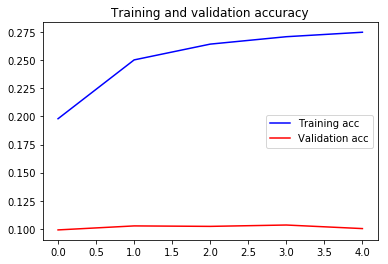

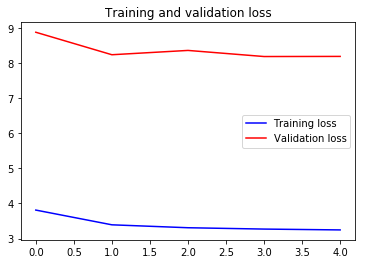

None


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
print(plt.show())

79/78 [==============================] - 6s 80ms/step
No of errors = 9954/10000


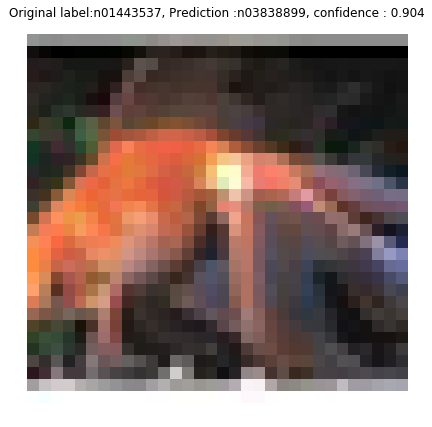

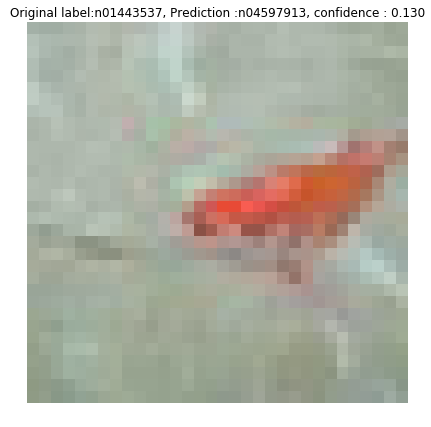

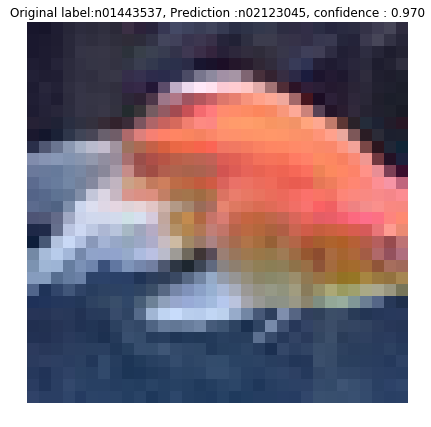

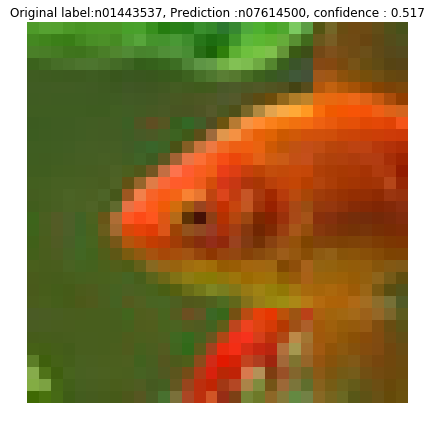

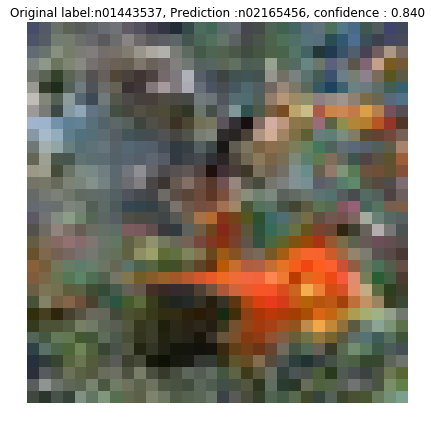

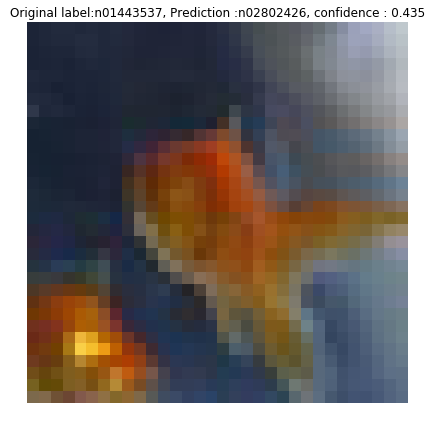

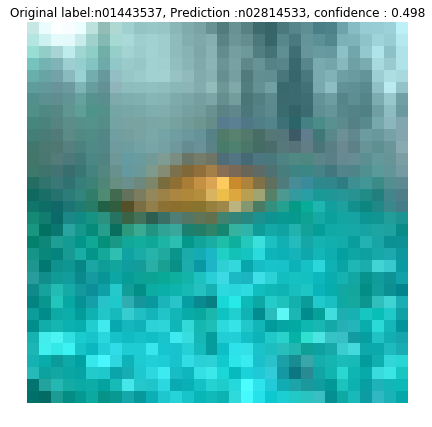

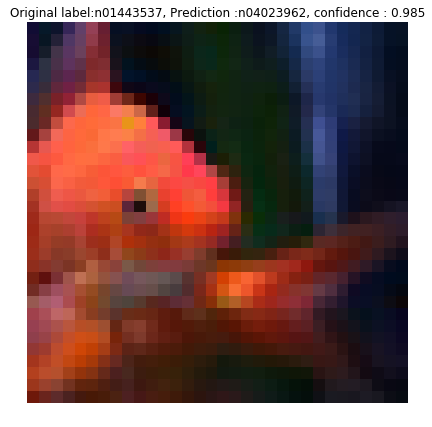

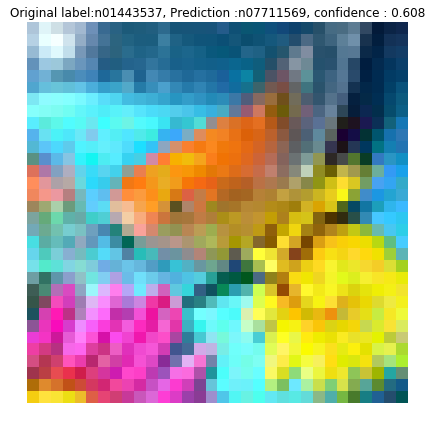

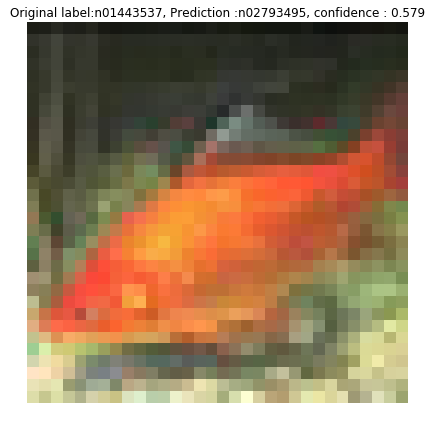

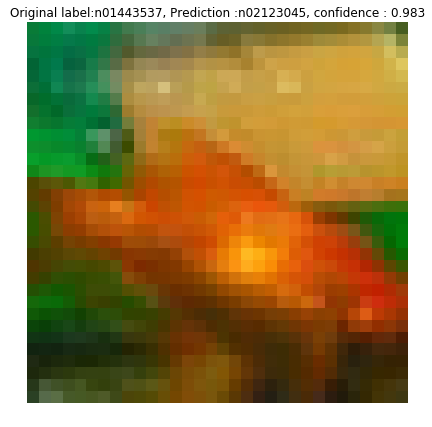

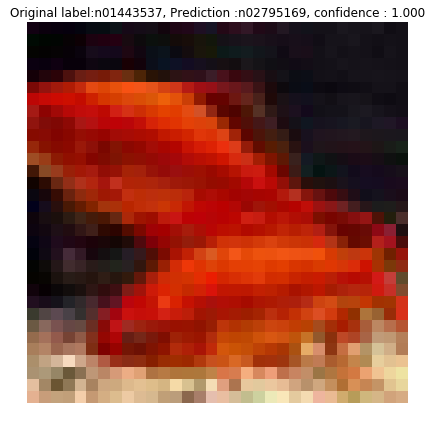

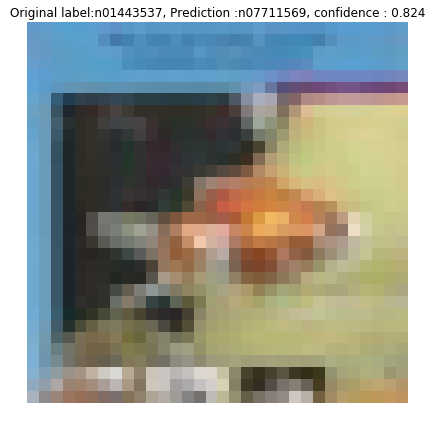

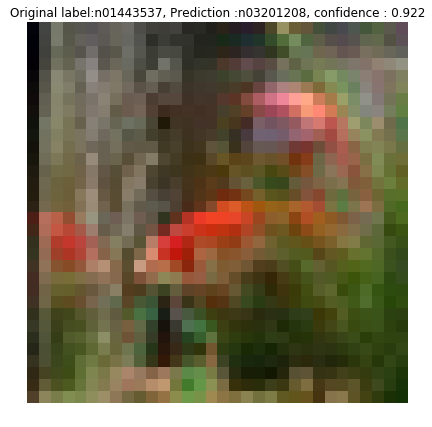

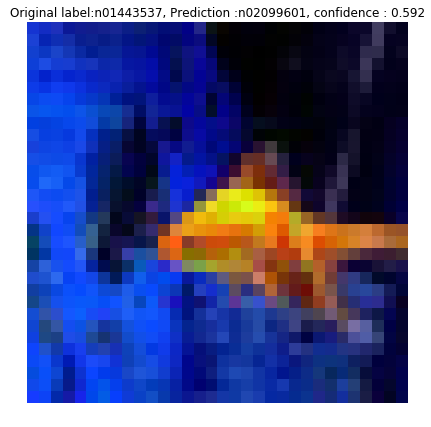

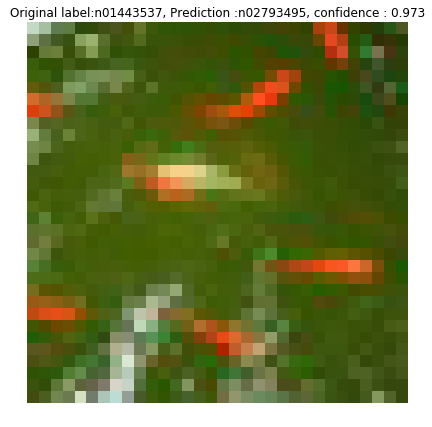

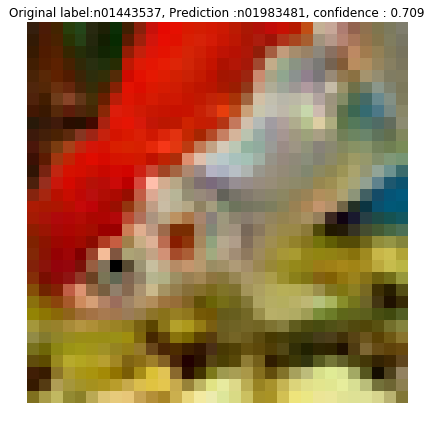

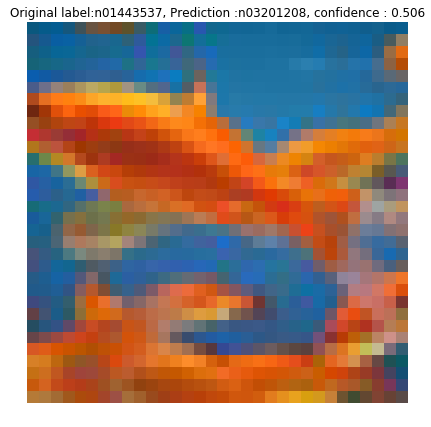

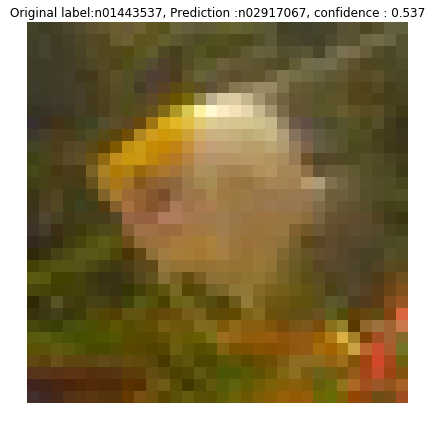

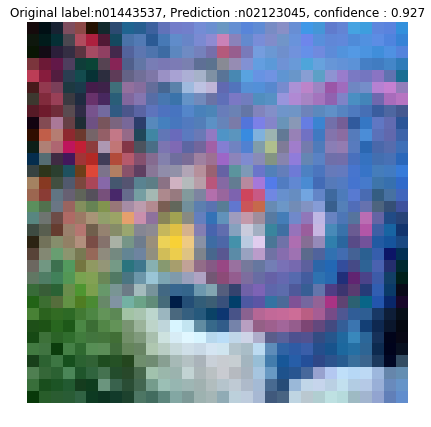

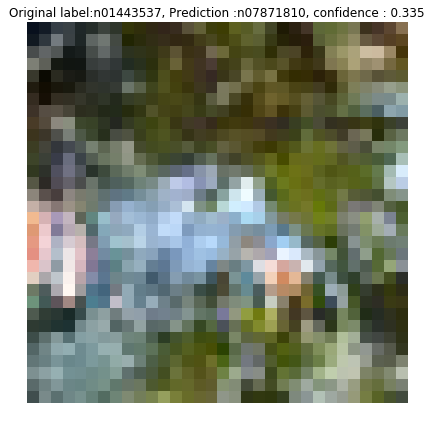

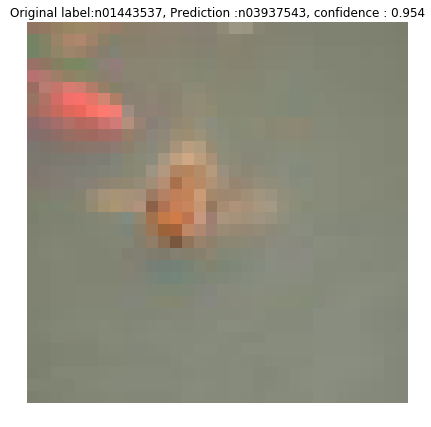

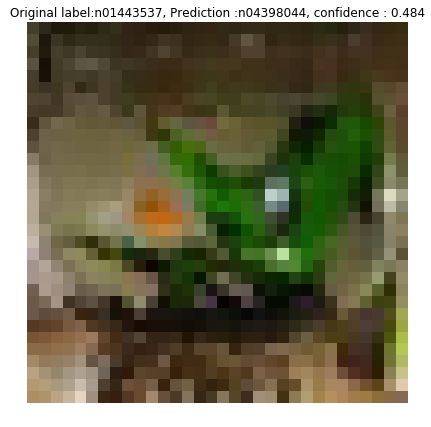

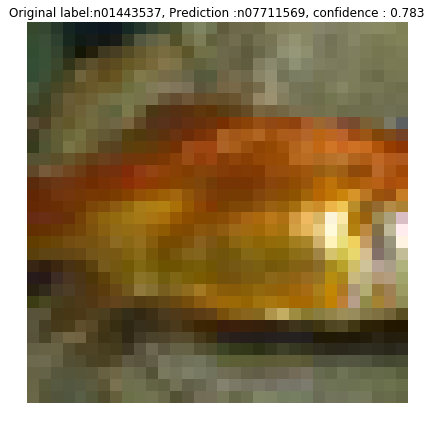

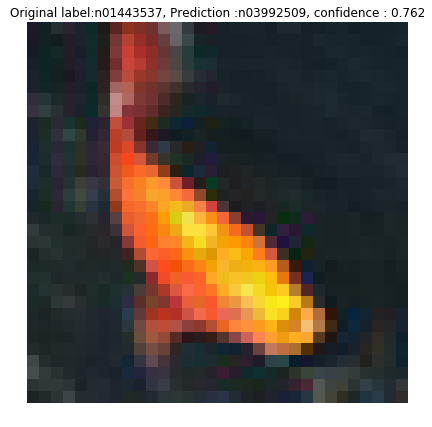

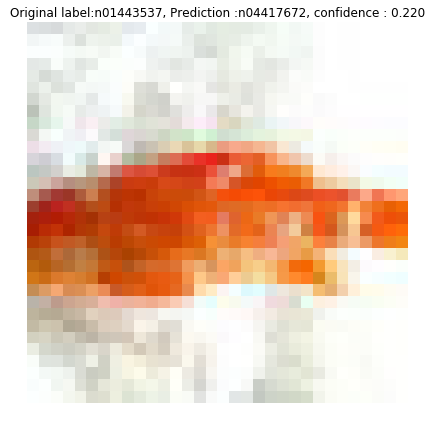

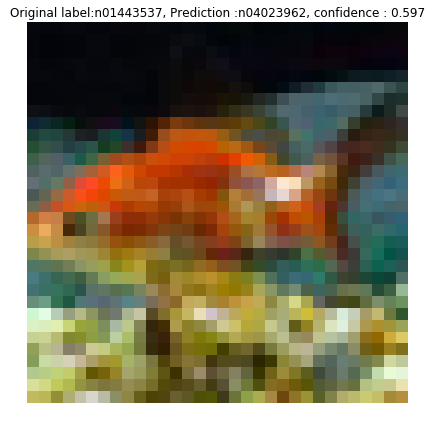

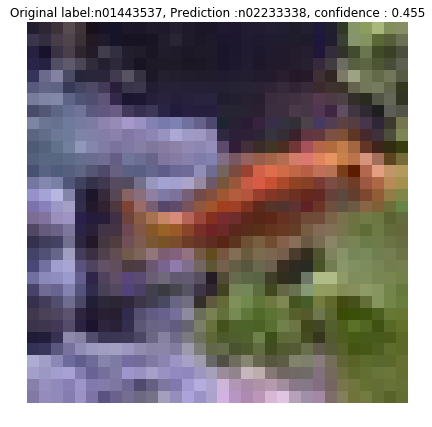

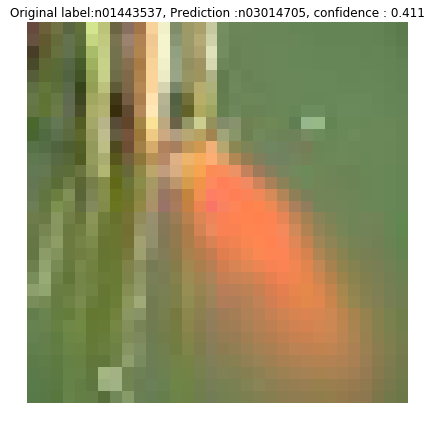

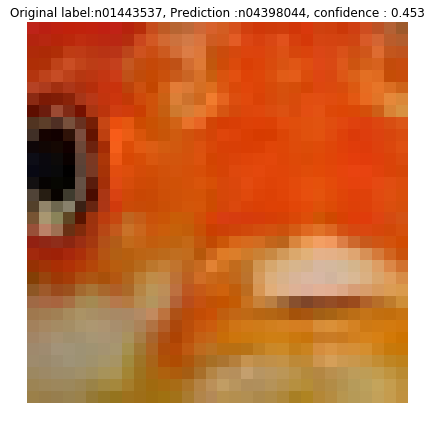

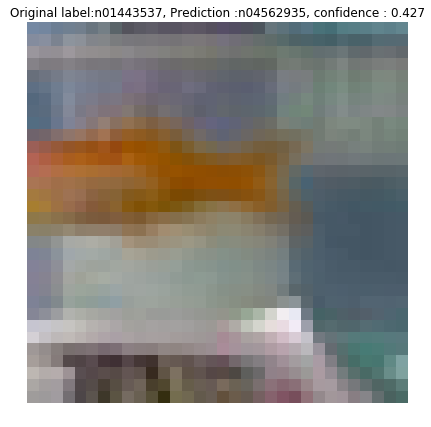

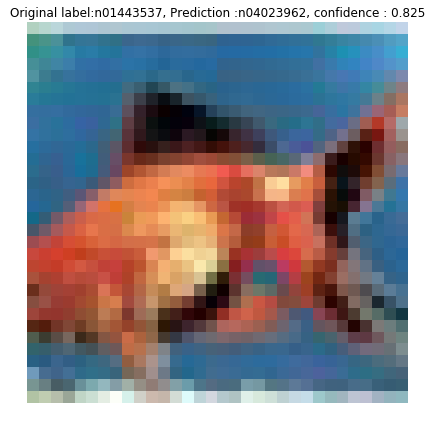

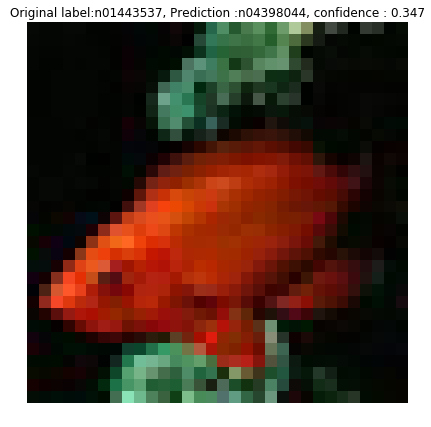

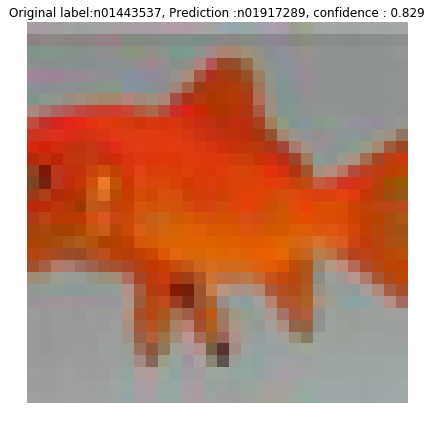

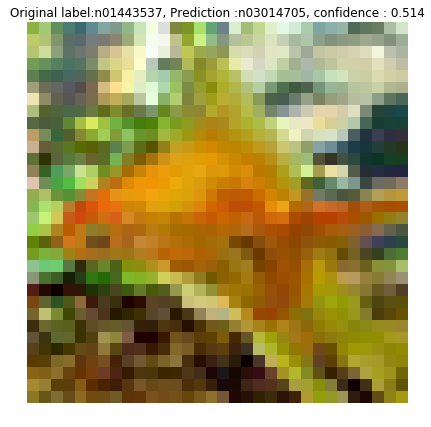

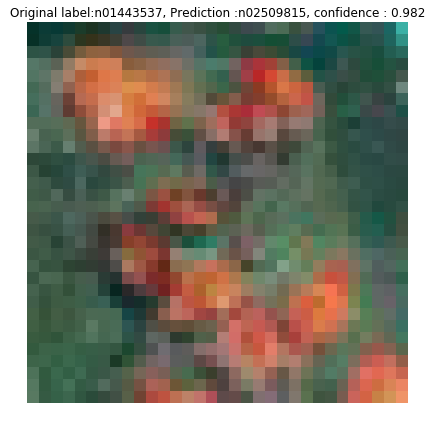

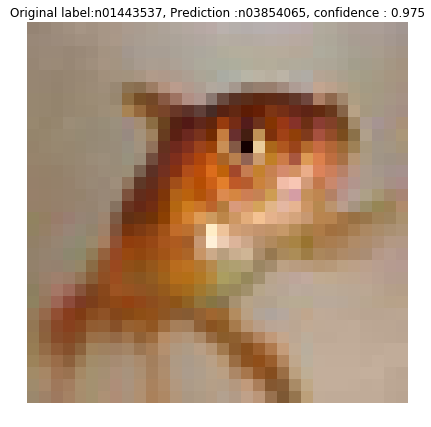

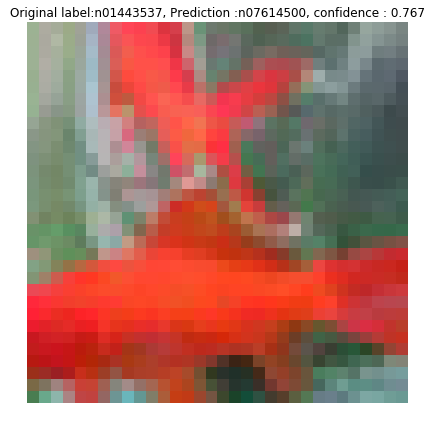

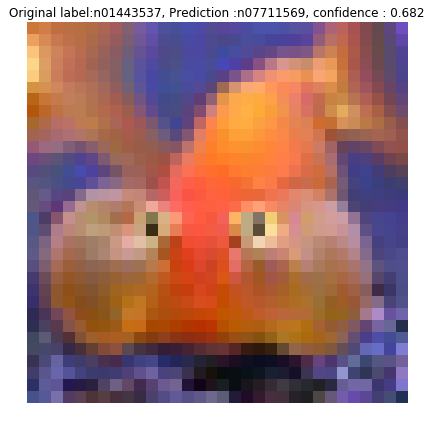

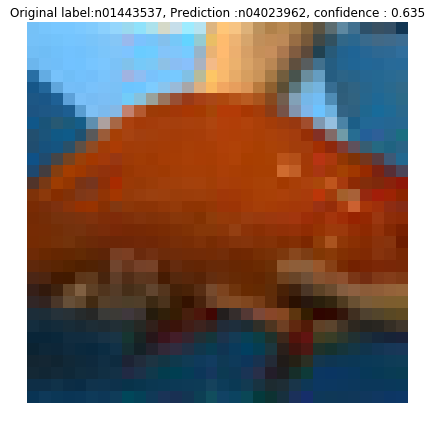

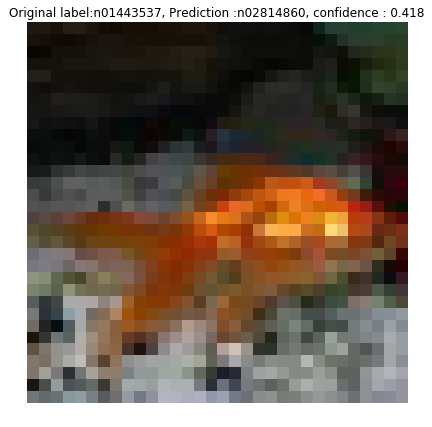

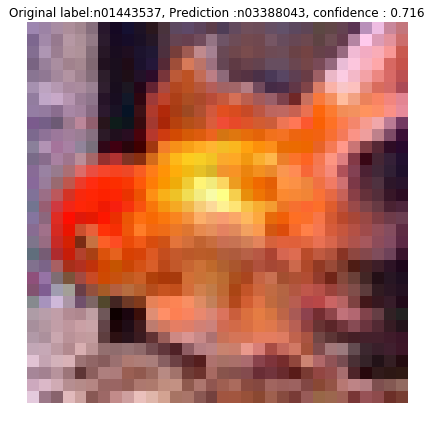

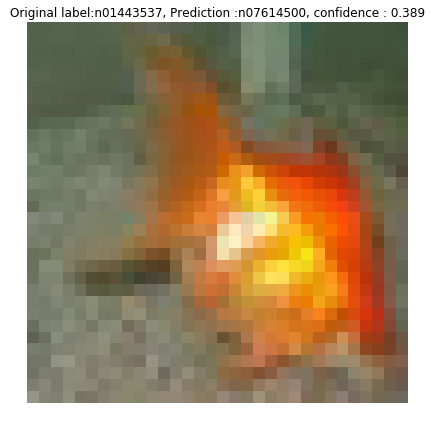

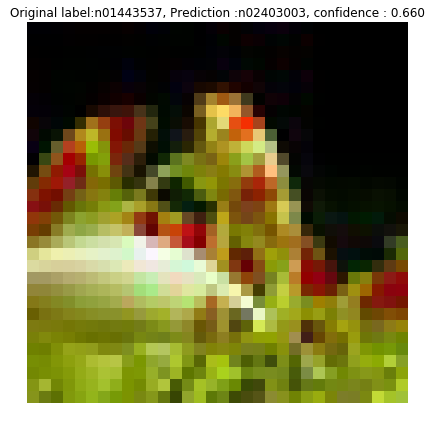

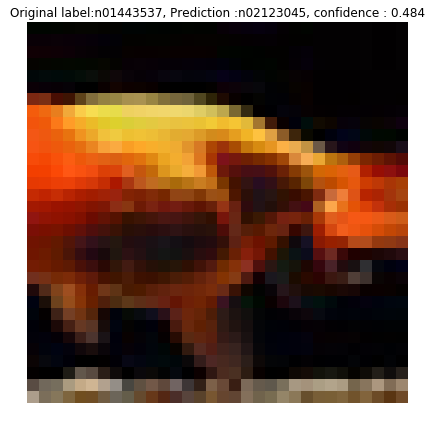

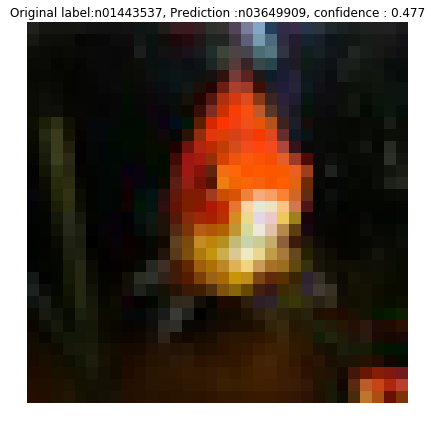

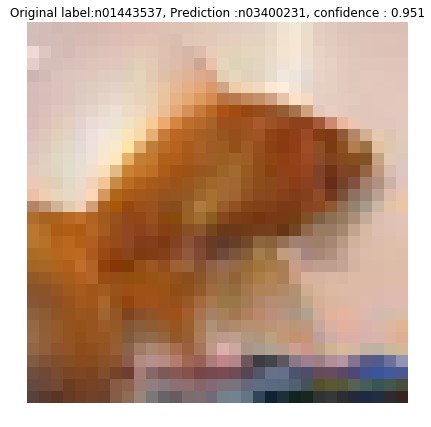

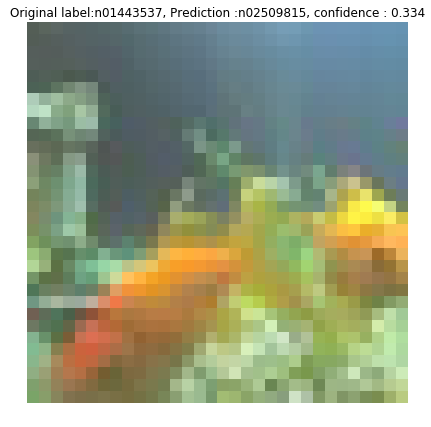

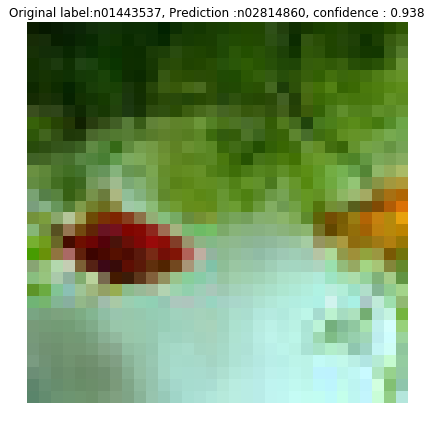

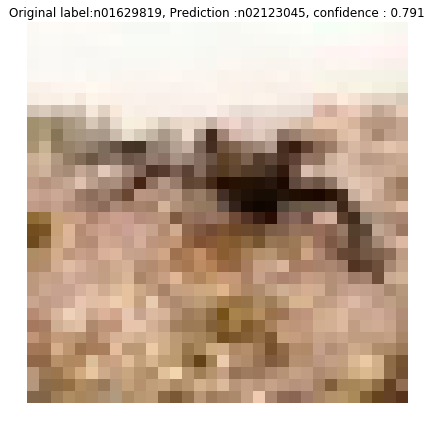

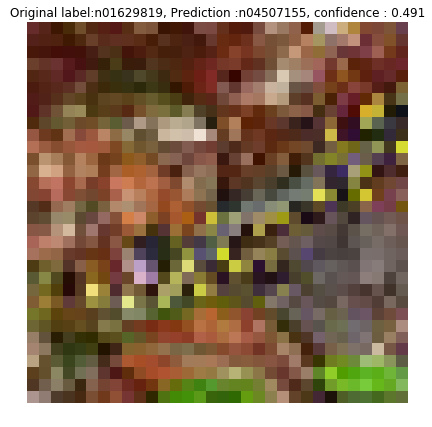

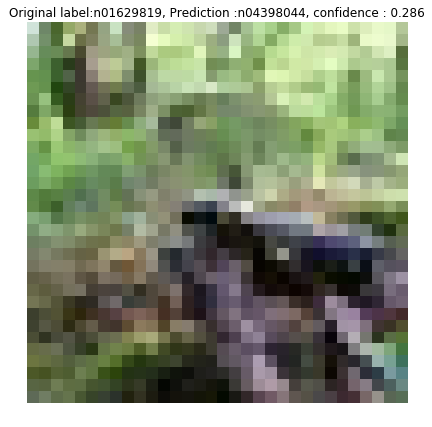

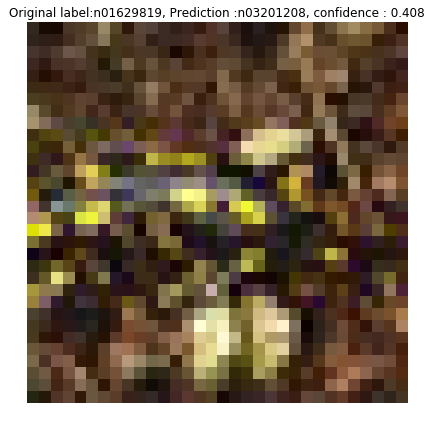

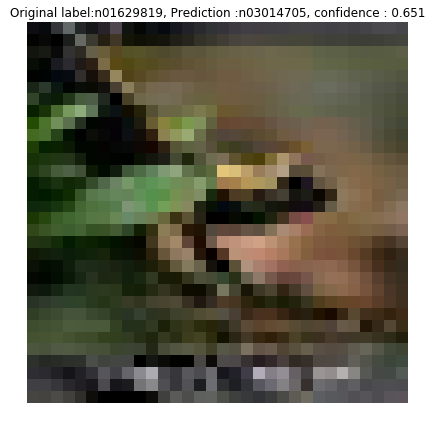

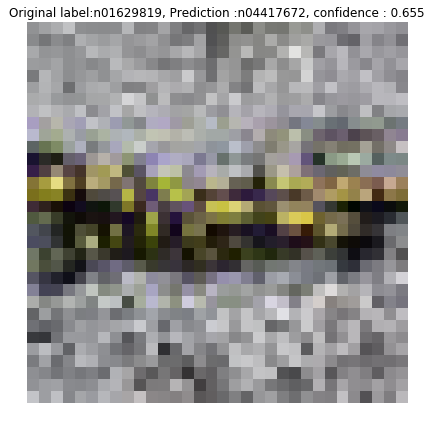

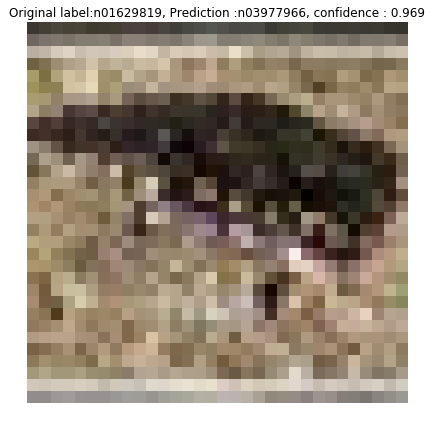

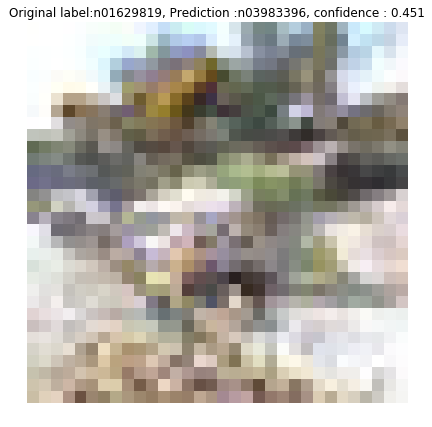

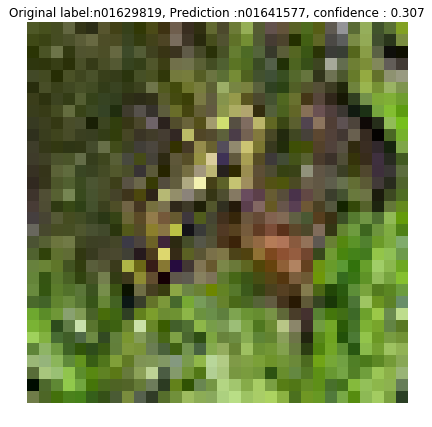

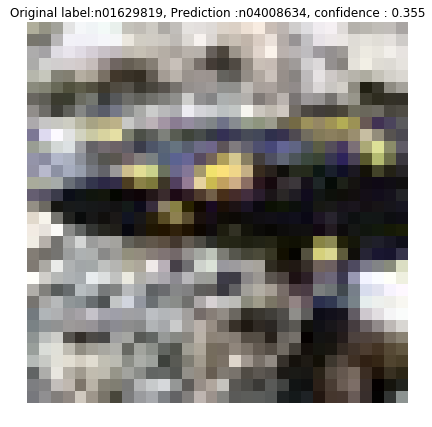

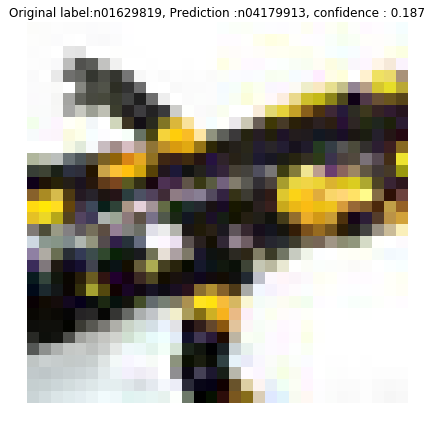

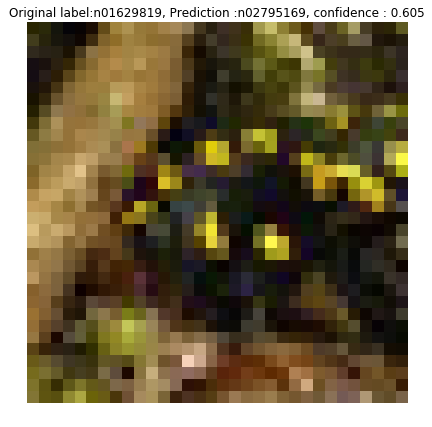

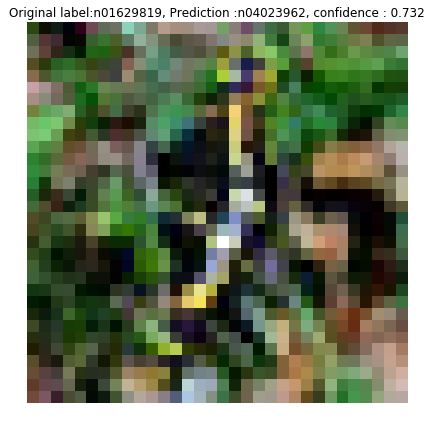

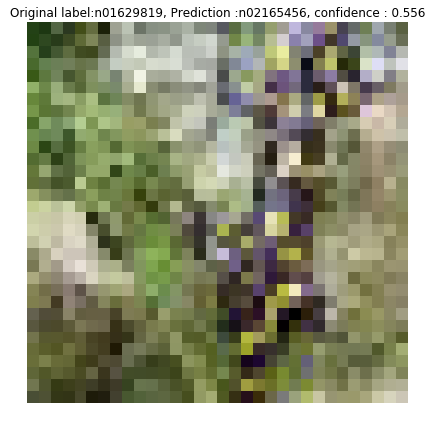

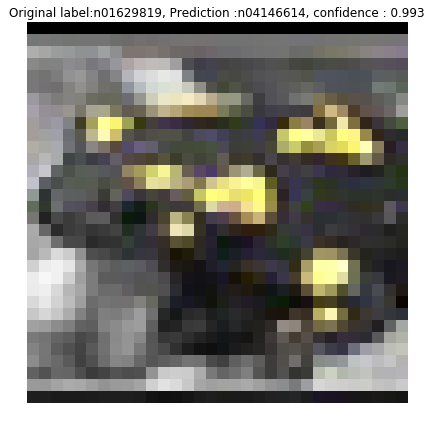

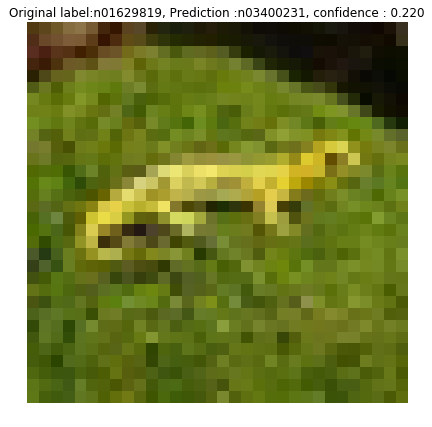

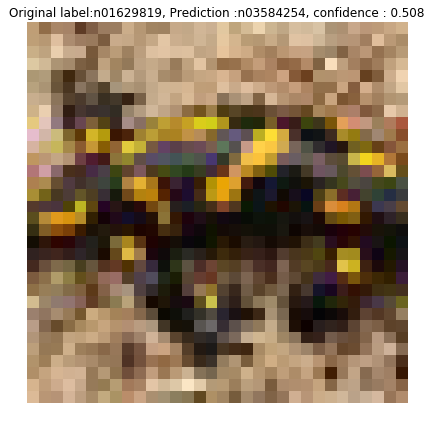

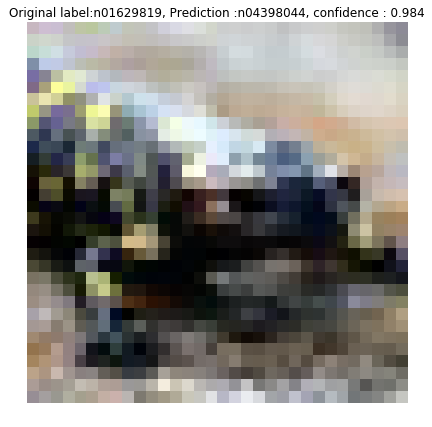

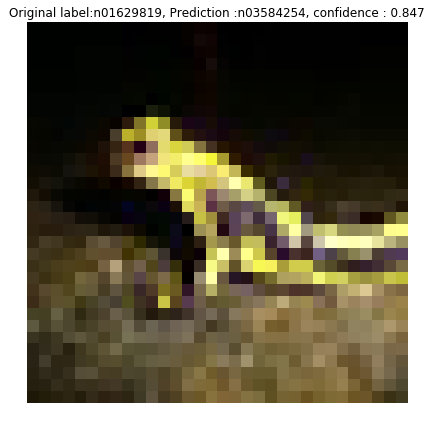

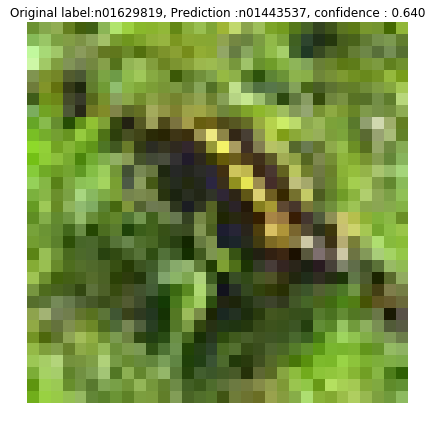

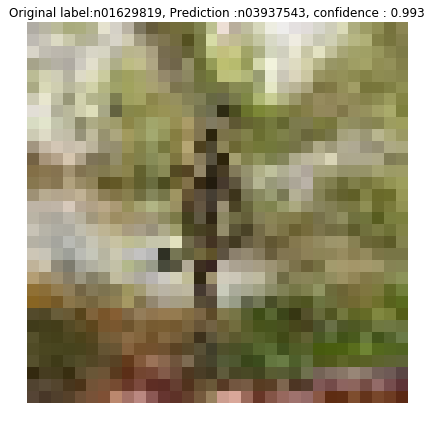

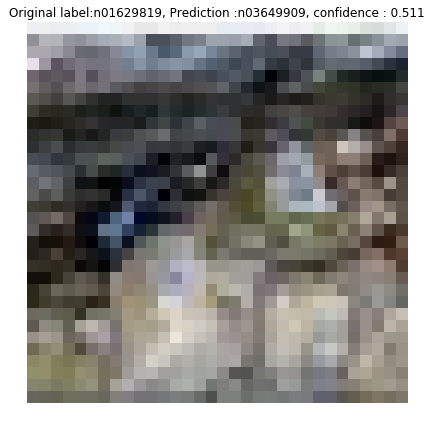

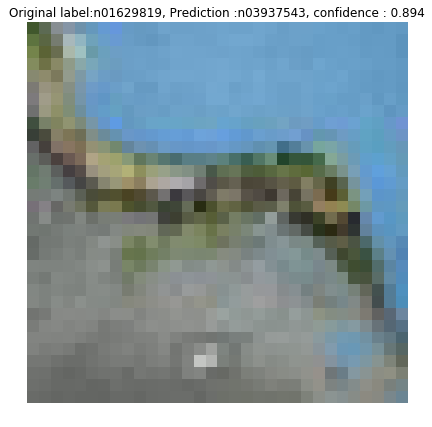

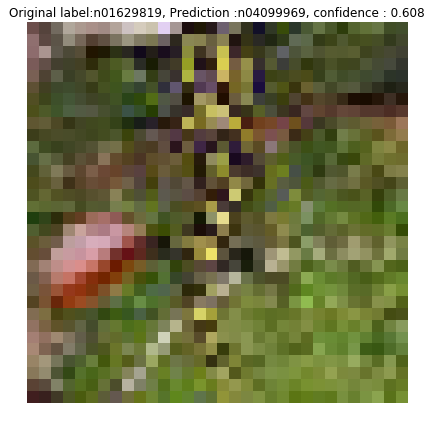

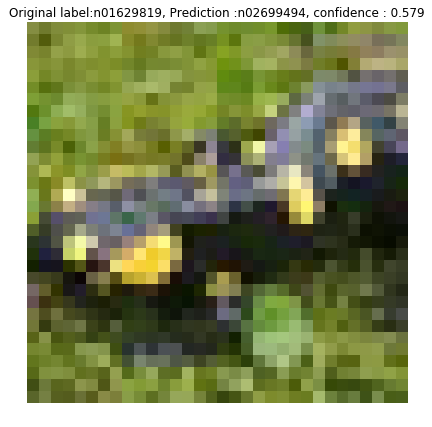

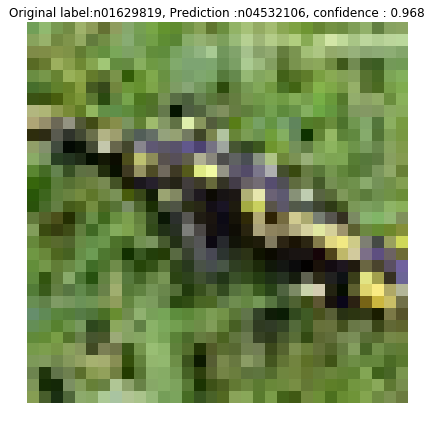

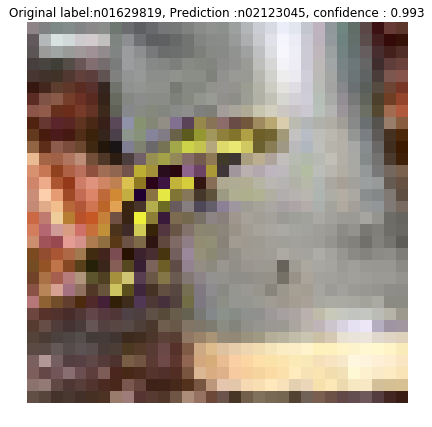

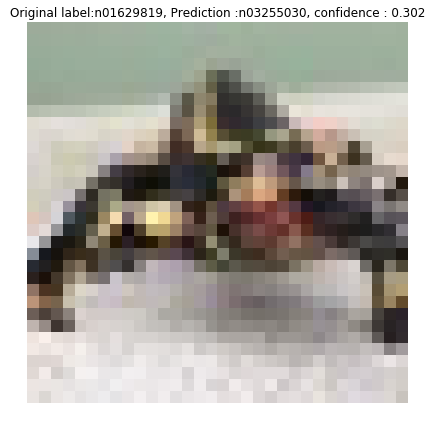

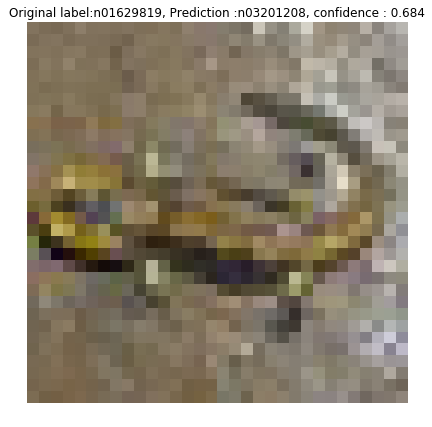

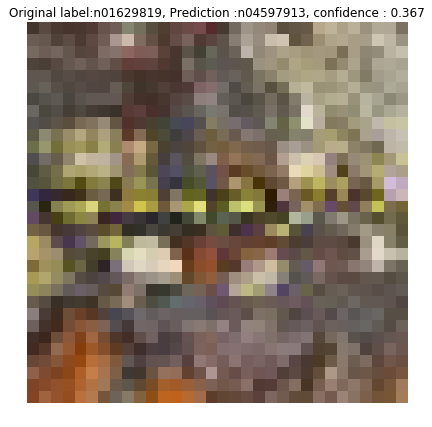

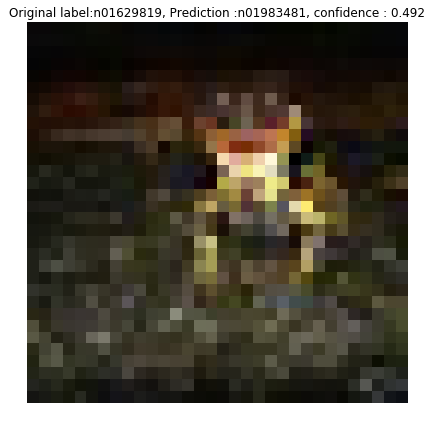

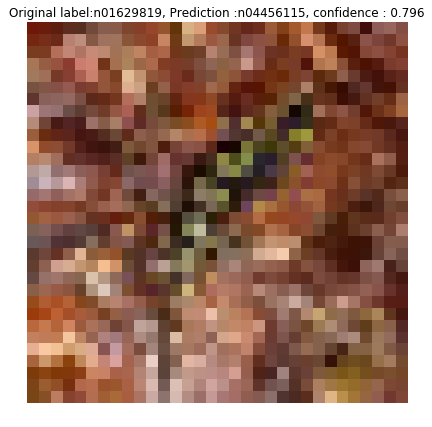

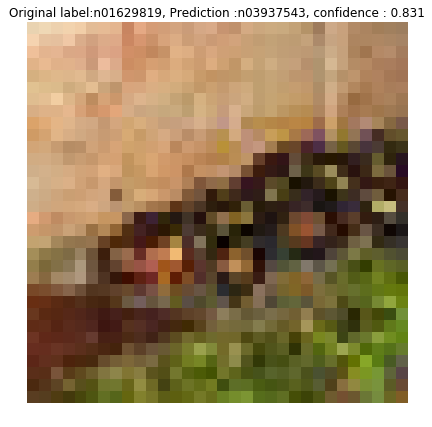

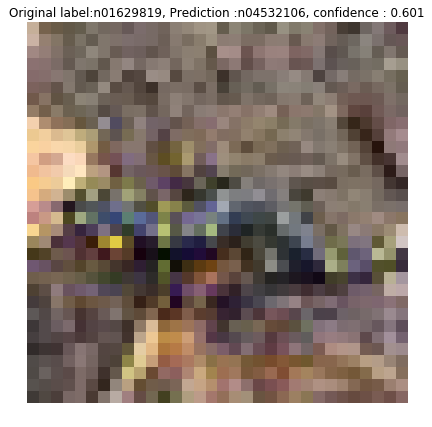

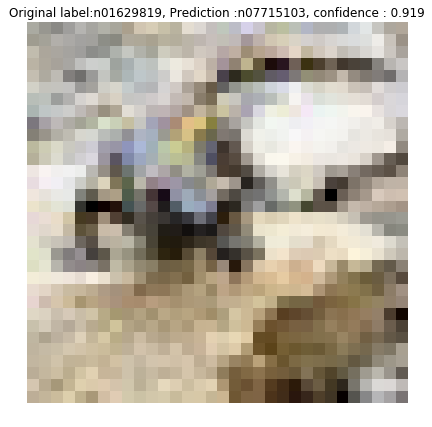

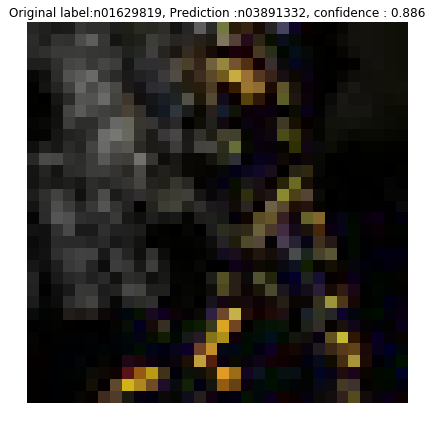

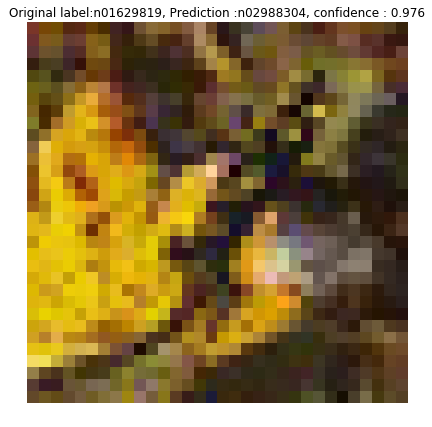

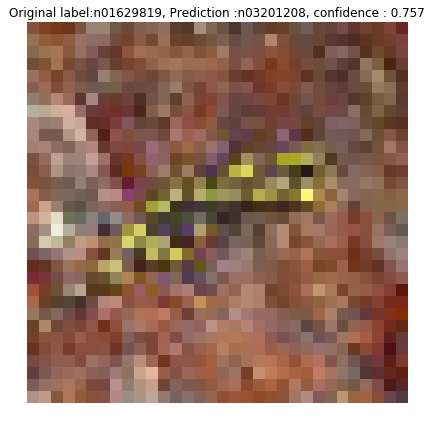

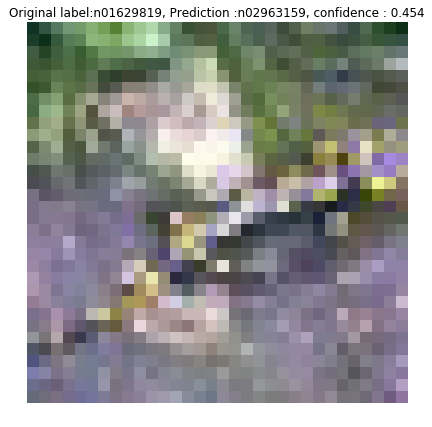

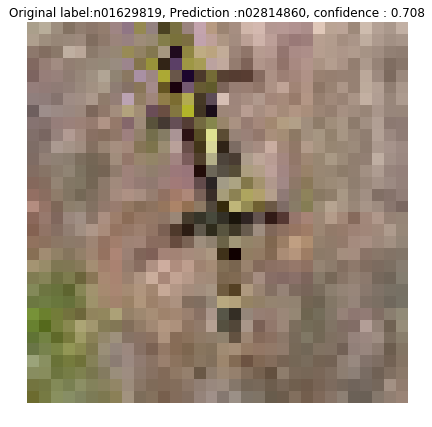

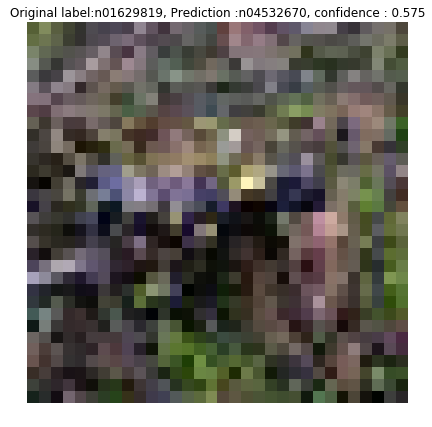

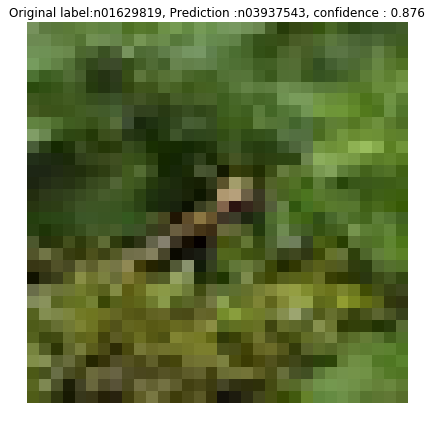

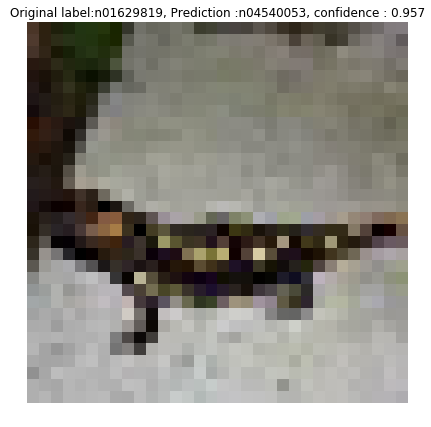

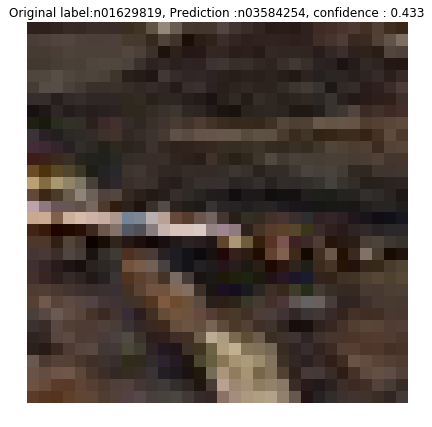

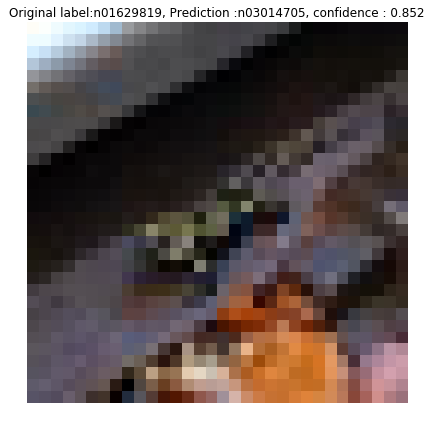

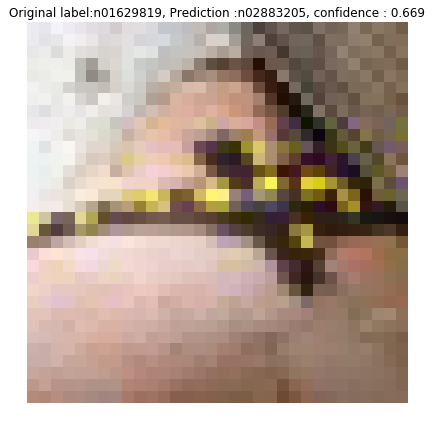

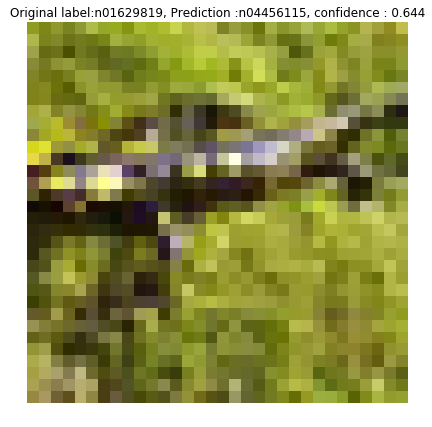

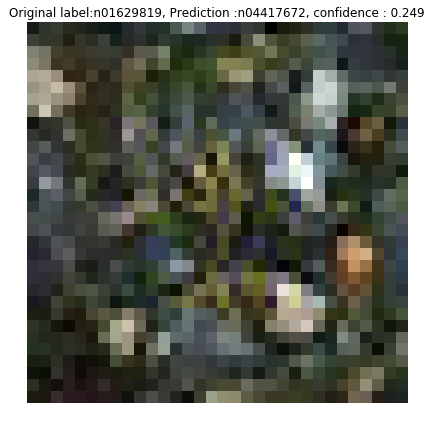

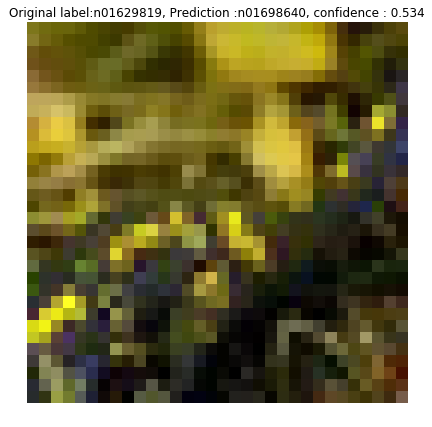

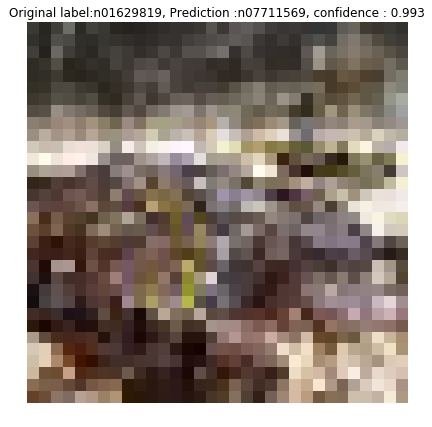

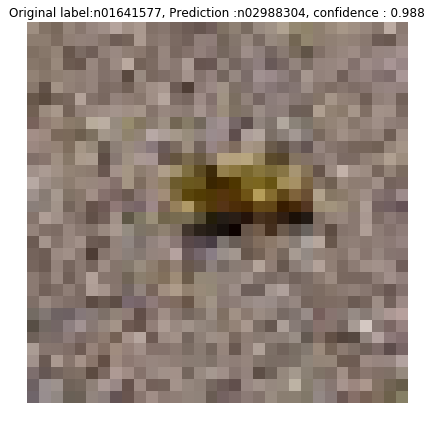

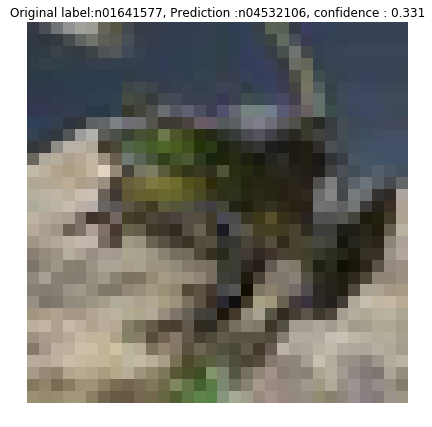

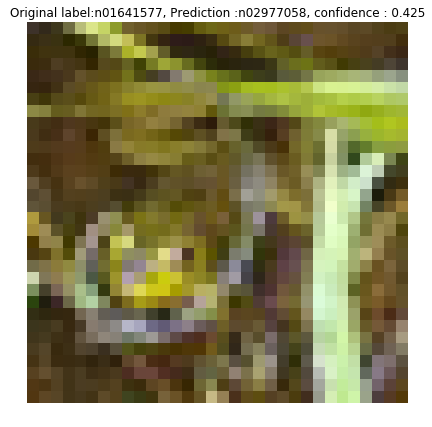

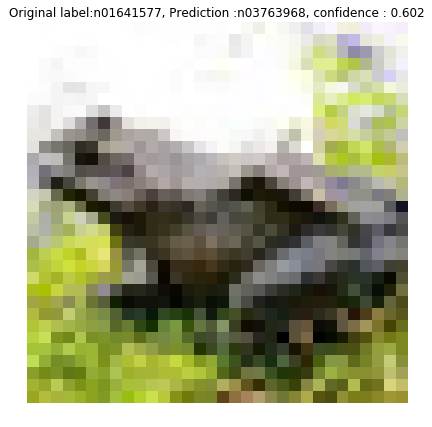

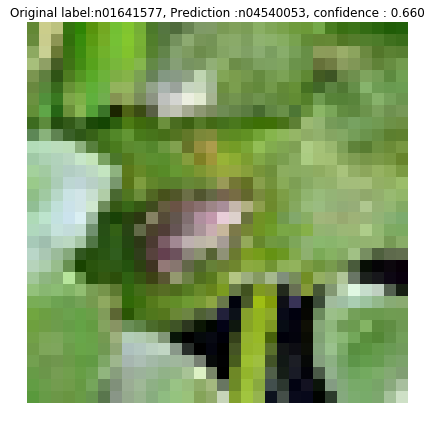

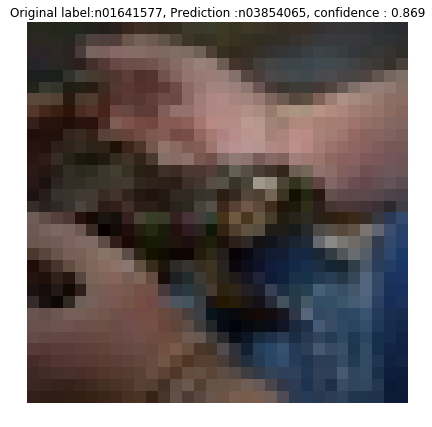

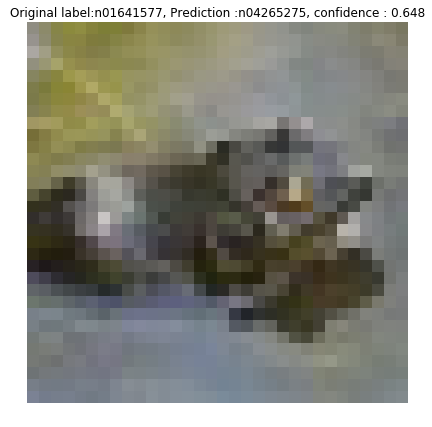

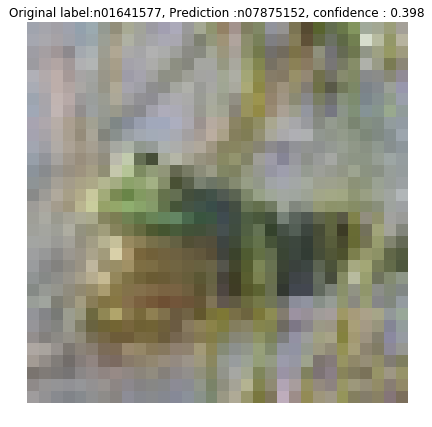

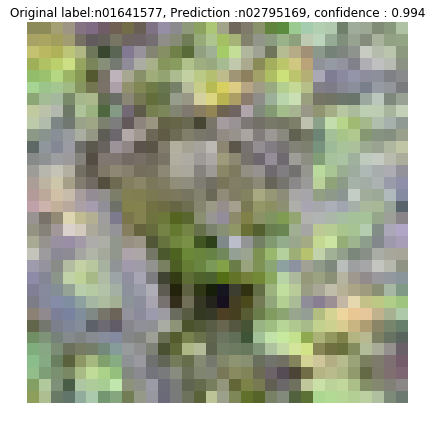

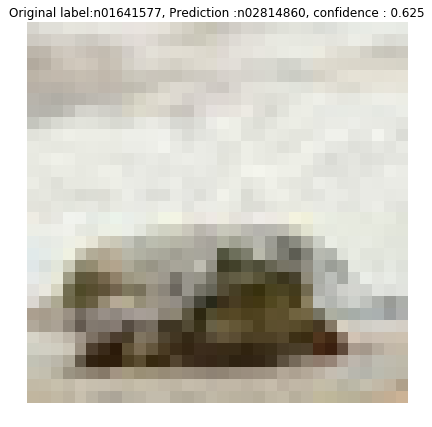

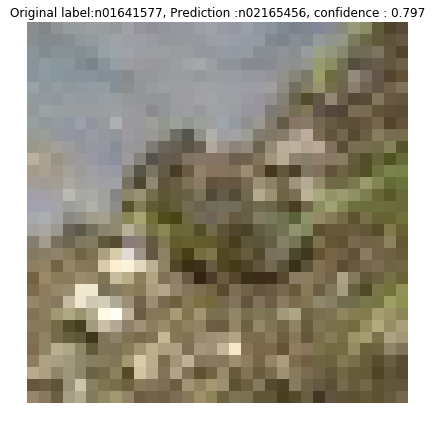

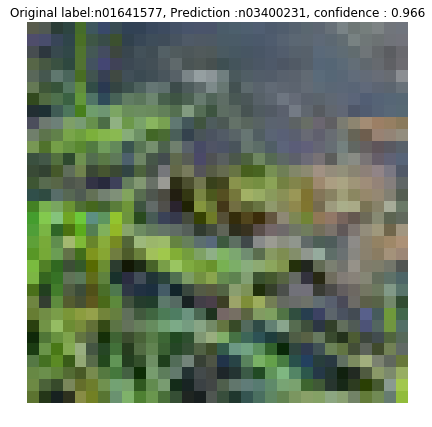

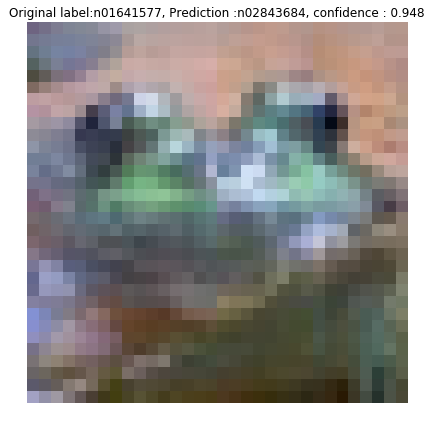

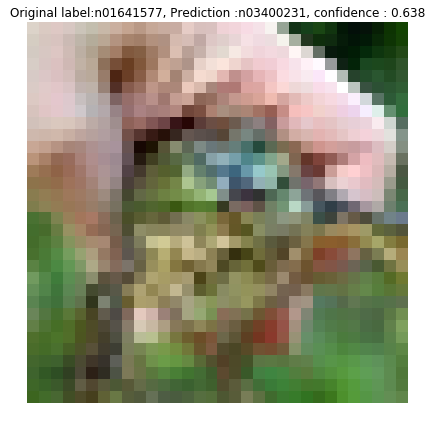

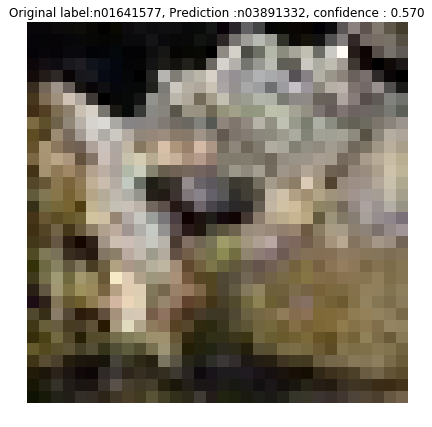

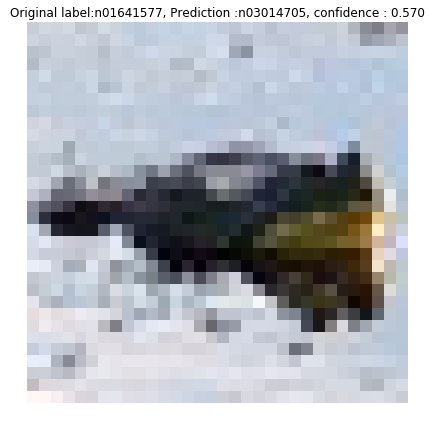

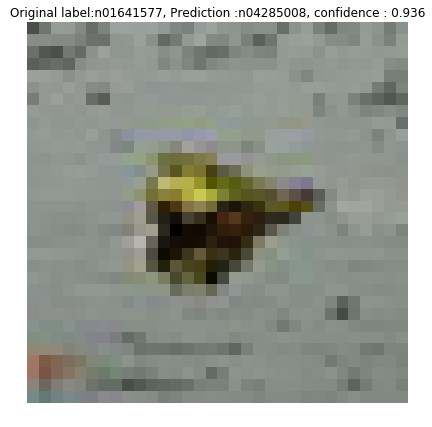

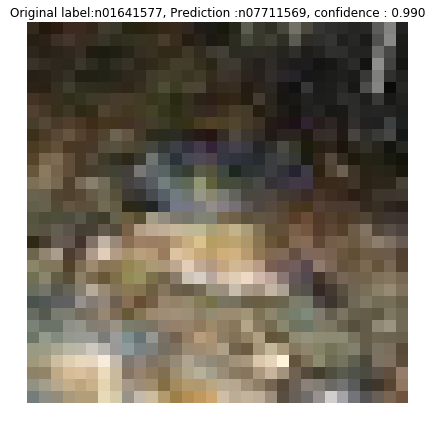

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img
# Get the filenames from the generator
validation_dir = '/home/ubuntu/DATA/ImageNet_Data/Validation/'
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()